# Introduction to K-means

![wandm](img/waysandmeans.jpeg) 
### not to be confused with the above (DC joke, get it?)

### By the end of this lecture, students will be able to:

- **Assess** what scenarios could use k-means

- **Articulate** the methodology used by k-means

- **Apply** KMeans from sklearn.cluster to a relevant dataset

- **Select** the appropriate number of clusters using k-means and the elbow method

- **Evaluate** the weaknesses and remedies to k-means

## Scenario

>You work for the marketing department within large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for [k-means can be found here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

![img](http://drive.google.com/uc?export=view&id=12uOIWDlAk5YRgy9FOALfUlK0fVt5JTvH)

In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import my own code for the demo clusters
from demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](img/initialscenario.png)


## Wait, how is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

#### Method 1

![left](img/from-left.gif)

#### Method 2

![right](img/from-right.gif)

#### Method 3

![top](img/from-top.gif)

#### Method 4

![bottom](img/from-bottom.gif)

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

In common:
- Green dots starts at points
- Calculates distance
- Moves dots
- Re-measures distance
- Moves dots as needed


Differences:
- Dots start in different places and groups settle in different places

Groups: 4

Problem with this method? too variable

#### Is four the best **k** for this data?

![kmeans4](img/kmeans4.png)

### K-means algorithm, at its core, in an optimization function

![minmax](img/minmaxdata.png)

### Reassigns groups and adjusts centroids to...
![min](img/min.png)

### And to...
![max](img/max.png)

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

#### Data for the exercise

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [2]:
dummy_dat = pd.read_csv("xclara.txt",header=0,index_col=0)

In [3]:
dummy_dat.head()

,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


#### EDA of variables

In [4]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


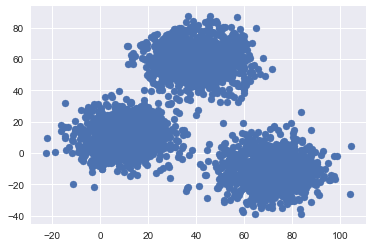

In [5]:
plt.scatter(dummy_dat['V1'], dummy_dat['V2'])

#### Introduction of `Kmeans`

In [6]:
model = KMeans(n_clusters=4).fit(dummy_dat)

In [7]:
model.cluster_centers_

array([[  9.45577774,  10.66209744],
       [ 69.92418447, -10.11964119],
       [ 47.94482171,  59.34919064],
       [ 31.58164808,  60.12059724]])

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have a repeatable results

In [8]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 48.09974943,  59.34612869],
       [ 69.92418447, -10.11964119],
       [  9.45577774,  10.66209744],
       [ 31.77135822,  60.10656849]])

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [9]:
#Practice code goes here
model5 = KMeans(n_clusters=5, random_state=10).fit(dummy_dat)
model5.cluster_centers_



array([[ 78.62132436,  -9.9770007 ],
       [  9.39317958,  10.68489975],
       [ 48.02195126,  59.32887199],
       [ 61.83031972, -10.20781682],
       [ 31.67711429,  60.13652232]])

In [10]:
model5 = KMeans(n_clusters=6, random_state=10).fit(dummy_dat)
model5.cluster_centers_

array([[ 77.4855006 , -15.24570657],
       [ 31.84346162,  59.89057886],
       [  1.56577513,   7.37588055],
       [ 63.64247569,  -5.86106381],
       [ 48.18415238,  59.66172791],
       [ 16.88233978,  13.81996504]])

In [11]:
model5 = KMeans(n_clusters=7, random_state=10).fit(dummy_dat)
model5.cluster_centers_

array([[ 16.81224112,  13.47498712],
       [ 45.18241379,  50.28389576],
       [ 75.86116482, -16.24064579],
       [  1.37092612,   7.60320101],
       [ 47.09316577,  67.40084149],
       [ 64.25540448,  -4.27515015],
       [ 29.87029767,  61.1543351 ]])

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of `k` to find the best value of `k`.
![inertia](img/inertia.png)

Sklearn refers to this value as the `inerta_` of the model.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

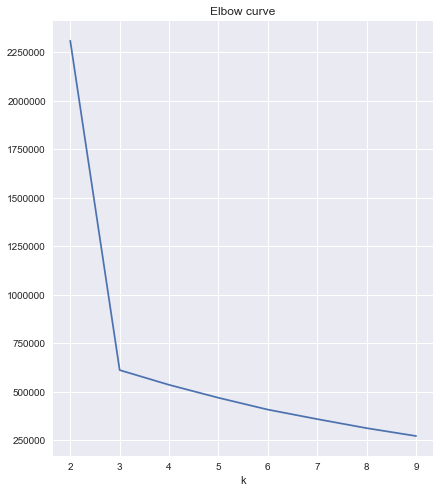

In [12]:
# Specifying the dataset and initializing variables
X = dummy_dat
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


### **Part 2B**: Silhouette coefficient

![silo](img/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

Silhouette coefficient ranges between 1 and -1. The closer to 1 the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





In [13]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

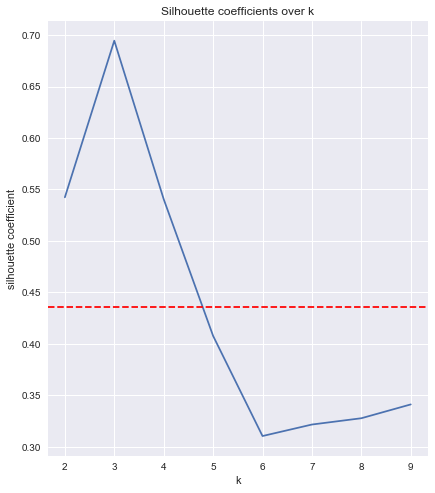

In [15]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

# pick the silhouette with the highest value

### Rules to remember when selecting k:

![bestk](img/elbosilo.png)

## **Part 3**: **Assumptions** and **challenges** of K-means

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

#### Ideal K-means scenario

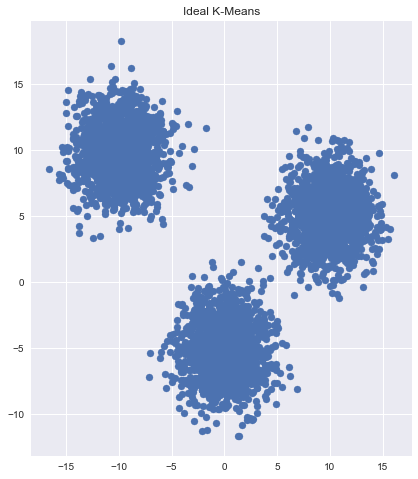

In [79]:
ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

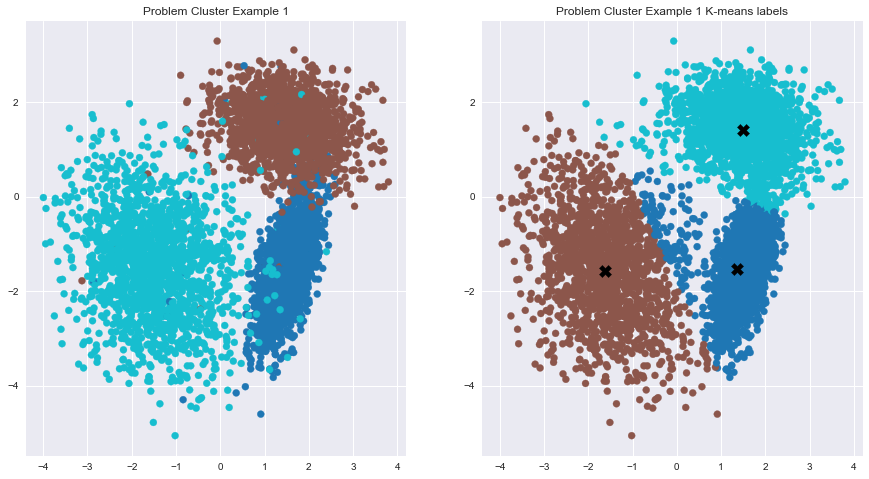

In [80]:
messyOne()

#### Problem Scenario 2 - imbalenced class size

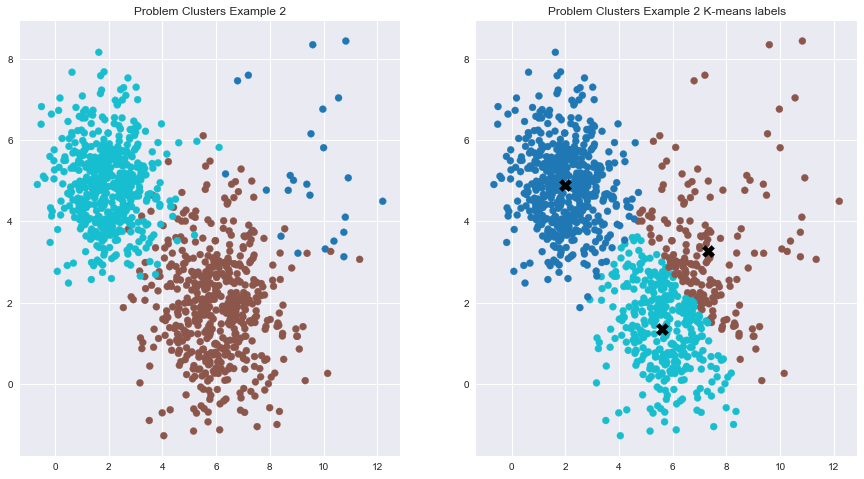

In [81]:
messyTwo()

#### Problem Scenario 3 - class size and density

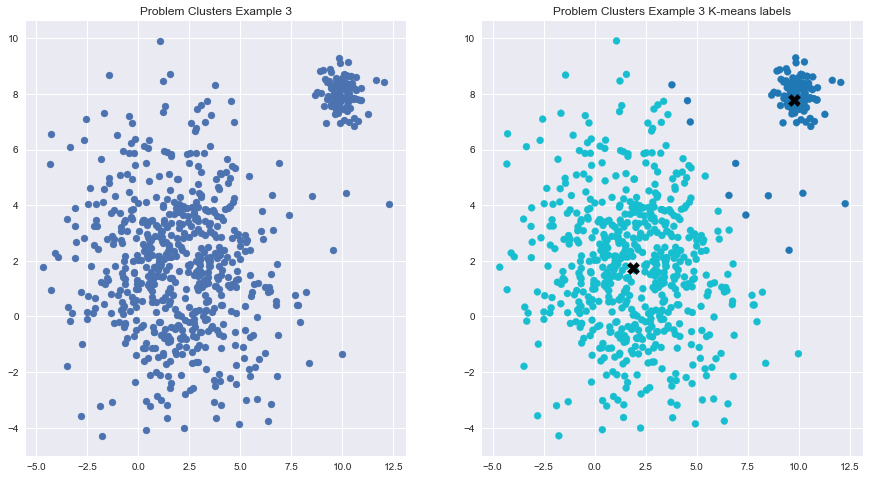

In [82]:
messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

## Exercise:
### K-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

![wine](https://images.pexels.com/photos/1097425/pexels-photo-1097425.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [22]:
# Work on problem here:
wine = pd.read_csv('Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Review k-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of k
4. Plot SSE and Silohuette coefficient to find best `k`
5. Describe the characteristics of each cluster using their centroids

### BUT

Let's say we aren't quite sure which scaler is the best to use for the data as well. Or, will the clustering be sensitive to what type of scaling we use?

Let us start demoing ways to look at that.

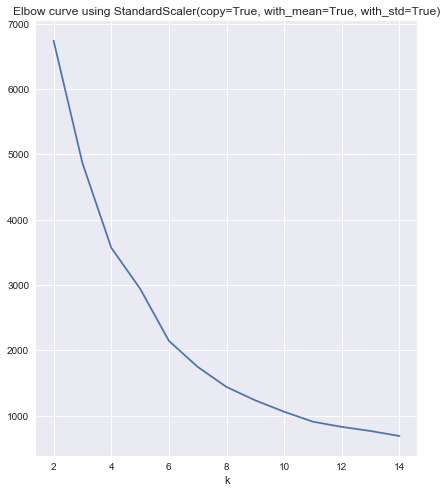

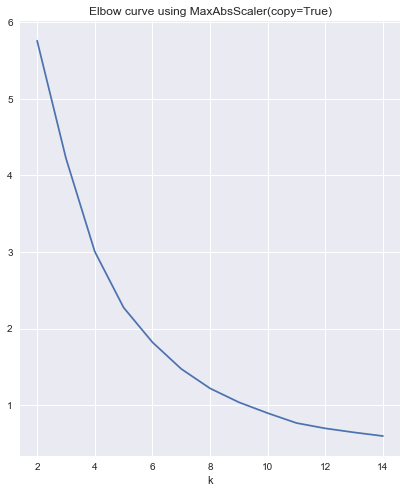

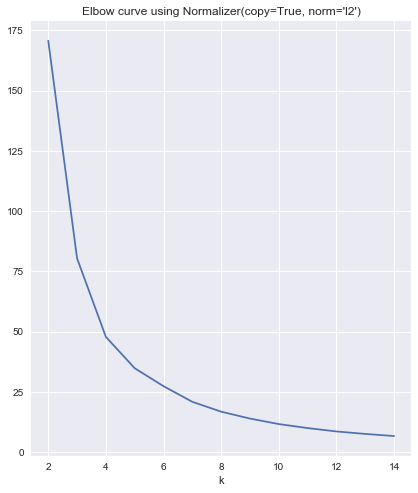

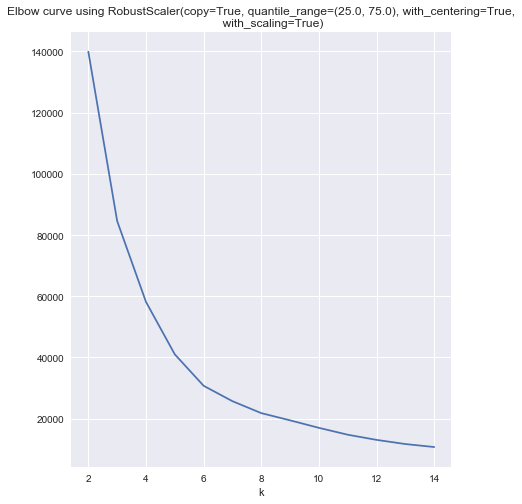

In [177]:
# Elbow Plot
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler
X = customer_df

stscl = StandardScaler()
maxabs = MaxAbsScaler()
norml= Normalizer()
rscale= RobustScaler()

scalars = [stscl, maxabs, norml, rscale]
num_k = list(range(2,15))

# Calculate SSE for different K
for scalar in scalars:   
    distorsions = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        test2 = KMeans(n_clusters=num, random_state=10).fit(test)
        distorsions.append(test2.inertia_)
    # Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Elbow curve using {scalar}')
    plt.xlabel('k')
    plt.plot(range(2, 15), distorsions)
    plt.grid(True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 we

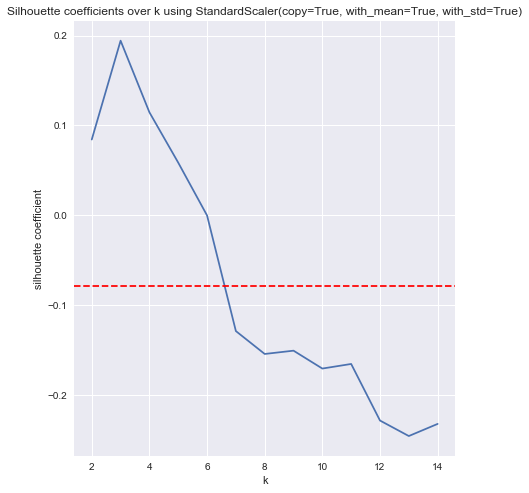

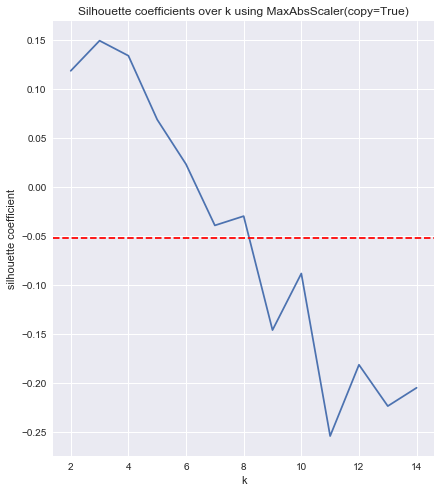

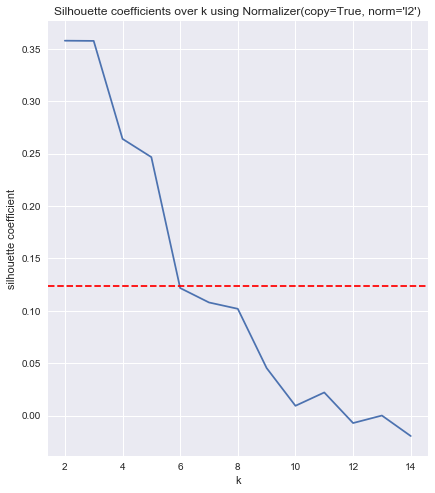

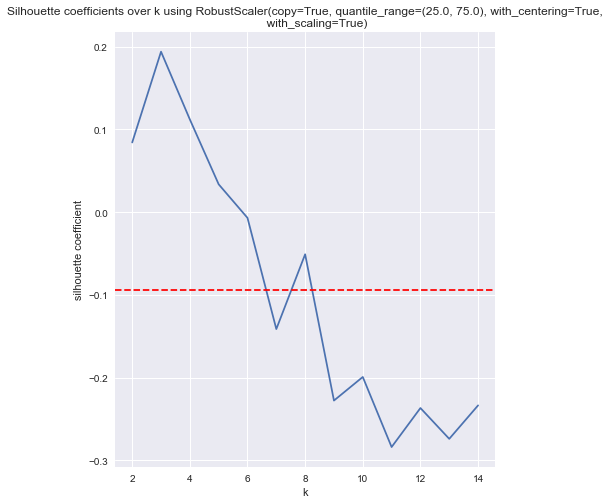

In [24]:
# Silohuette coefficient

# Calculate SSE for different K
for scalar in scalars:   
    silhouette_plot = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        #test2 = KMeans(n_clusters=num).fit(test)
        clusters = KMeans(n_clusters=num, random_state=10)
        cluster_labels = clusters.fit_predict(test)
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        silhouette_plot.append(silhouette_avg)

    # Plot Silhouette coefficient
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Silhouette coefficients over k using {scalar}')
    plt.xlabel('k')
    plt.ylabel('silhouette coefficient')
    plt.plot(range(2, 15), silhouette_plot)
    plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
    plt.grid(True)

### How many clusters fit the data?

What can you tell me about them?

## One last example

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.
![shopping](https://images.pexels.com/photos/50987/money-card-business-credit-card-50987.jpeg?auto=format%2Ccompress&cs=tinysrgb&dpr=2&h=750&w=1260)

In [229]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings('ignore')

shopping = pd.read_excel('Online Retail.xlsx')

In [230]:
shopping.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [231]:
shopping['CustomerID'].value_counts(normalize=True).head()

17841.0    0.019622
14911.0    0.014510
14096.0    0.012605
12748.0    0.011410
14606.0    0.006838
Name: CustomerID, dtype: float64

In [235]:
shopping['LineItemTotal']=shopping['Quantity'] * shopping['UnitPrice']

invoice_df = shopping.copy().groupby(['CustomerID', 'InvoiceNo']).sum()
invoice_df.drop('UnitPrice', axis=1, inplace=True)
invoice_df.head()

customer_df = invoice_df.copy().groupby('CustomerID').sum()
customer_df = customer_df.rename(index=str, columns={"LineItemTotal": "CustomerTotal"})  # change column name to customer total


In [236]:
invoice_df.head()
invoice_df['InvoiceNo'] = [str(i[1])[0] for i in invoice_df.index]
invoice_df['NoInvoices'] = -1
invoice_df['NoInvoices'] = invoice_df['NoInvoices'].where(invoice_df["InvoiceNo"]=="C", 1, axis=0)
invoice_df.drop(['InvoiceNo'], axis=1, inplace=True)
# str(invoice_df.index[row][1]) == type('str')


In [237]:
invoice_df.head(20)

Quantity  LineItemTotal  NoInvoices
CustomerID InvoiceNo                                     
12346.0    541431        74215       77183.60           1
           C541433      -74215      -77183.60          -1
12347.0    537626          319         711.79           1
           542237          315         475.39           1
           549222          483         636.25           1
           556201          196         382.52           1
           562032          277         584.91           1
           573511          676        1294.32           1
           581180          192         224.82           1
12348.0    539318         1254         892.80           1
           541998          601         227.44           1
           548955          269         367.00           1
           568172          217         310.00           1
12349.0    577609          631        1757.55           1
12350.0    543037          197         334.40           1
12352.0    544156           98         296.50           1
           545323           26         144.35           1
           545332            3         840.30           1
           546869           63         120.33           1
           547390           64         160.33           1

In [238]:
customer_df = invoice_df.groupby('CustomerID').sum()

customer_df = customer_df.rename(index=str, columns={"LineItemTotal": "CustomerTotal", "Quantity": "TotalQuantityPurchased"})

In [239]:
# totalperinvoice = shopping[['InvoiceNo', 'LineItemTotal']].groupby('InvoiceNo').sum()
# totalperinvoice

# cust = shopping[['CustomerID', 'InvoiceNo']]
# cust.groupby("CustomerID")
# totalperinvoice.merge(cust, how="left", on="InvoiceNo")


In [240]:
customer_df.head()

,TotalQuantityPurchased,CustomerTotal,NoInvoices
CustomerID,,,
12346.0,0,0.00,0
12347.0,2458,4310.00,7
12348.0,2341,1797.24,4
12349.0,631,1757.55,1
12350.0,197,334.40,1


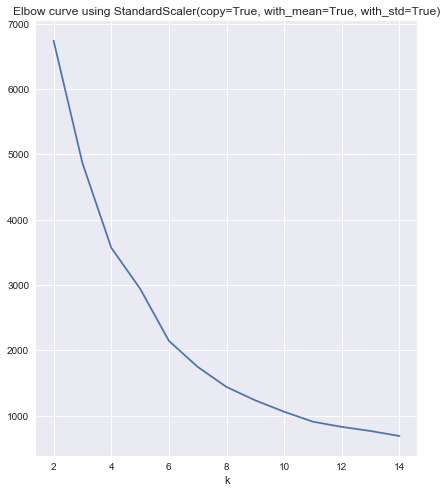

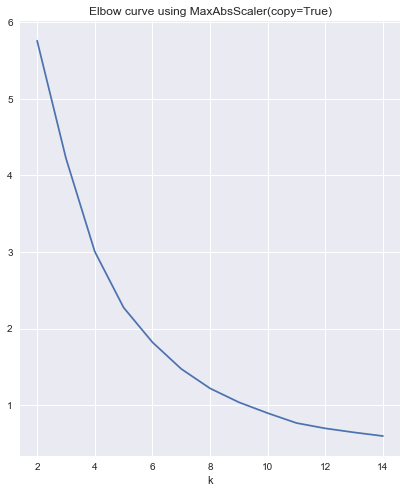

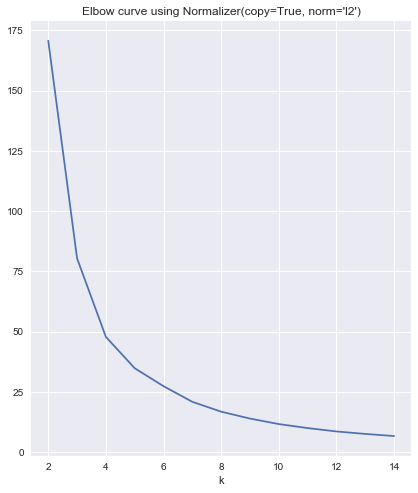

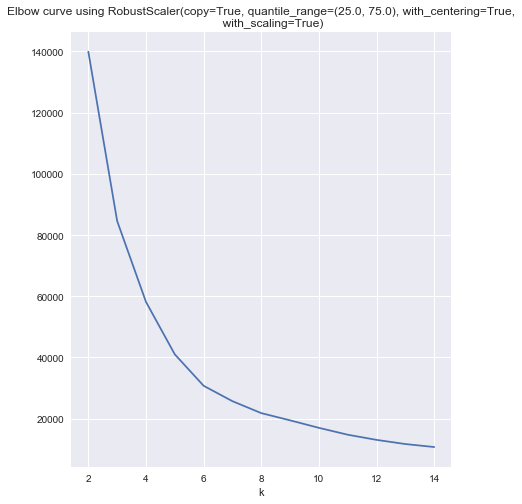

In [179]:
# Elbow Plot
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler
X = customer_df

stscl = StandardScaler()
maxabs = MaxAbsScaler()
norml= Normalizer()
rscale= RobustScaler()

scalars = [stscl, maxabs, norml, rscale]
num_k = list(range(2,15))

# Calculate SSE for different K
for scalar in scalars:   
    distorsions = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        test2 = KMeans(n_clusters=num, random_state=10).fit(test)
        distorsions.append(test2.inertia_)
    # Plot values of SSE
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Elbow curve using {scalar}')
    plt.xlabel('k')
    plt.plot(range(2, 15), distorsions)
    plt.grid(True)

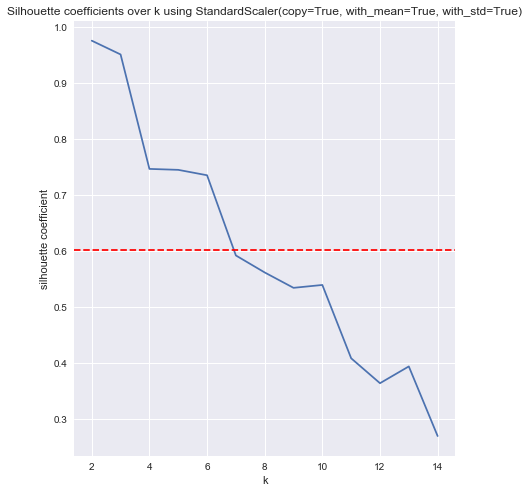

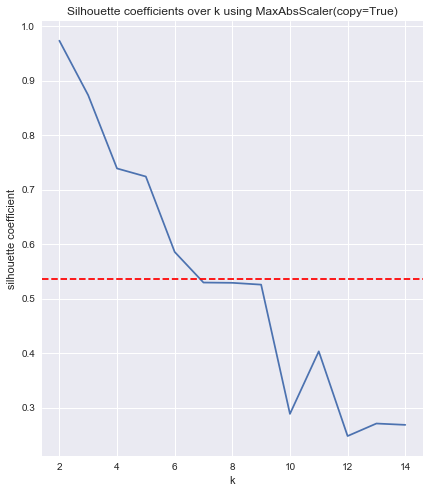

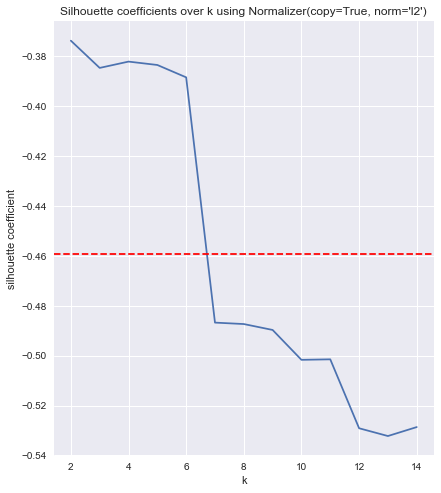

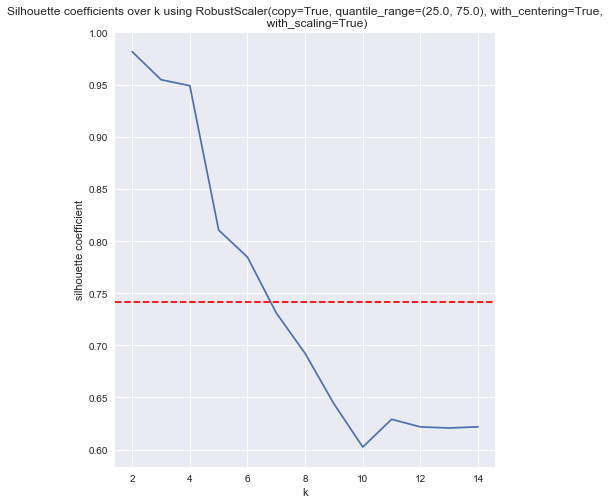

In [180]:
for scalar in scalars:   
    silhouette_plot = []
    for num in num_k:
        
        test=scalar.fit_transform(X)
        #test2 = KMeans(n_clusters=num).fit(test)
        clusters = KMeans(n_clusters=num, random_state=10)
        cluster_labels = clusters.fit_predict(test)
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        silhouette_plot.append(silhouette_avg)

    # Plot Silhouette coefficient
    plt.figure(figsize=(15,8))
    plt.subplot(121, title=f'Silhouette coefficients over k using {scalar}')
    plt.xlabel('k')
    plt.ylabel('silhouette coefficient')
    plt.plot(range(2, 15), silhouette_plot)
    plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
    plt.grid(True)

In [182]:
X = customer_df
stscl = StandardScaler()
X_scaled = stscl.fit_transform(X)

silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X_scaled)
    silhouette_avg = metrics.silhouette_score(X_scaled, cluster_labels)
    silhouette_plot.append(silhouette_avg)

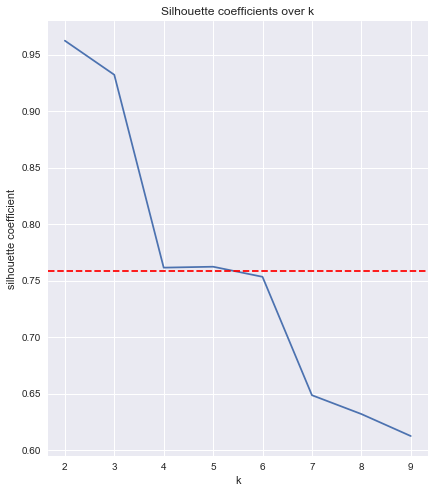

In [183]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

# pick the silhouette with the highest value

In [208]:
clusters = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusters.fit_predict(X_scaled)
silhouette_avg = metrics.silhouette_score(X_scaled, cluster_labels)

In [209]:
silhouette_avg

0.9321234703235464

In [214]:
cluster_labels[500:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [223]:
shopper_cluster = AgglomerativeClustering(n_clusters=3)
pred_shopper_clust = shopper_cluster.fit_predict(X_scaled)
# plt.scatter(X_iris[:, 0], X_iris[:, 2], c = pred_iris_clust, s = 10);

In [224]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, pred_shopper_clust)

0.8331548858650907

In [225]:
customer_df['labels'] = pred_shopper_clust

In [226]:
customer_df.loc[customer_df['labels']==1]

,TotalQuantityPurchased,CustomerTotal,NoInvoices,labels
CustomerID,,,,
12437.0,2918,4896.66,17,1
12540.0,6677,13309.04,15,1
12569.0,1793,4064.99,29,1
12621.0,7404,13612.07,17,1
12681.0,7518,13677.59,17,1
12682.0,5575,12288.22,31,1
12720.0,4654,5713.28,21,1
12841.0,2683,3876.40,24,1
12877.0,1178,1535.77,12,1


In [227]:
customer_df.loc[customer_df['labels']==2]

,TotalQuantityPurchased,CustomerTotal,NoInvoices,labels
CustomerID,,,,
12346.0,0,0.00,0,2
12347.0,2458,4310.00,7,2
12348.0,2341,1797.24,4,2
12349.0,631,1757.55,1,2
12350.0,197,334.40,1,2
12352.0,470,1545.41,5,2
12353.0,20,89.00,1,2
12354.0,530,1079.40,1,2
12355.0,240,459.40,1,2


In [228]:
customer_df.loc[customer_df['labels']==0]

,TotalQuantityPurchased,CustomerTotal,NoInvoices,labels
CustomerID,,,,
12415.0,77242,123725.45,16,0
12748.0,24210,29072.10,196,0
13694.0,61803,62653.10,40,0
14156.0,57025,113384.14,44,0
14298.0,58021,50862.44,43,0
14646.0,196719,279489.02,71,0
14911.0,77180,132572.62,154,0
16684.0,49390,65892.08,25,0
17450.0,69029,187482.17,37,0
